In [ ]:
# In this project I tried to predict whether a person living in Saudi Arabia is a Male or a Female  based on the features given 
# I used the basic algorithm for each model since the data is small
# This project is for learning purpose

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy as sp
from google.colab import files
import io
import warnings
warnings.simplefilter("ignore")



In [2]:
uploaded = files.upload()

Saving feat_engineering_salary_by_edu.csv to feat_engineering_salary_by_edu.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['feat_engineering_salary_by_edu.csv']))

In [4]:
df.head()

,Unnamed: 0,Degree Level,Nationality,Gender,Salary
0,0,Primary,NonSaudi,Female,1590
1,1,Primary,NonSaudi,Male,2173
2,2,Primary,Saudi,Female,4172
3,3,Primary,Saudi,Male,6172
4,4,Primary,NonSaudi,Female,1597


In [5]:
#drop Unnamed: 0 
df.drop(['Unnamed: 0'], axis =1, inplace=True)
df

,Degree Level,Nationality,Gender,Salary
0,Primary,NonSaudi,Female,1590
1,Primary,NonSaudi,Male,2173
2,Primary,Saudi,Female,4172
3,Primary,Saudi,Male,6172
4,Primary,NonSaudi,Female,1597
...,...,...,...,...
499,Doctorate,Saudi,Male,35622
500,Doctorate,NonSaudi,Female,16727
501,Doctorate,NonSaudi,Male,23036
502,Doctorate,Saudi,Female,24632


In [6]:
# Dummy variables
df_D = pd.get_dummies(df, columns=['Degree Level', 'Nationality'],drop_first=True)

In [7]:
df_D.head()

,Gender,Salary,Degree Level_Diploma,Degree Level_Doctorate,Degree Level_Intermediate,Degree Level_Master Degree,Degree Level_Primary,Degree Level_Secondary,Nationality_Saudi
0,Female,1590,0,0,0,0,1,0,0
1,Male,2173,0,0,0,0,1,0,0
2,Female,4172,0,0,0,0,1,0,1
3,Male,6172,0,0,0,0,1,0,1
4,Female,1597,0,0,0,0,1,0,0


In [8]:
X = df_D.drop('Gender',axis =1)
y = pd.get_dummies(df_D, columns=['Gender'],drop_first=True)

In [9]:
y

,Salary,Degree Level_Diploma,Degree Level_Doctorate,Degree Level_Intermediate,Degree Level_Master Degree,Degree Level_Primary,Degree Level_Secondary,Nationality_Saudi,Gender_Male
0,1590,0,0,0,0,1,0,0,0
1,2173,0,0,0,0,1,0,0,1
2,4172,0,0,0,0,1,0,1,0
3,6172,0,0,0,0,1,0,1,1
4,1597,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
499,35622,0,1,0,0,0,0,1,1
500,16727,0,1,0,0,0,0,0,0
501,23036,0,1,0,0,0,0,0,1
502,24632,0,1,0,0,0,0,1,0


In [10]:
y = y['Gender_Male']

In [11]:
y

0      0
1      1
2      0
3      1
4      0
      ..
499    1
500    0
501    1
502    0
503    1
Name: Gender_Male, Length: 504, dtype: uint8

In [12]:
df_D

,Gender,Salary,Degree Level_Diploma,Degree Level_Doctorate,Degree Level_Intermediate,Degree Level_Master Degree,Degree Level_Primary,Degree Level_Secondary,Nationality_Saudi
0,Female,1590,0,0,0,0,1,0,0
1,Male,2173,0,0,0,0,1,0,0
2,Female,4172,0,0,0,0,1,0,1
3,Male,6172,0,0,0,0,1,0,1
4,Female,1597,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
499,Male,35622,0,1,0,0,0,0,1
500,Female,16727,0,1,0,0,0,0,0
501,Male,23036,0,1,0,0,0,0,0
502,Female,24632,0,1,0,0,0,0,1


In [13]:
y

0      0
1      1
2      0
3      1
4      0
      ..
499    1
500    0
501    1
502    0
503    1
Name: Gender_Male, Length: 504, dtype: uint8

In [14]:
y.unique()

array([0, 1], dtype=uint8)

In [15]:
#splitting the data
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)

In [19]:
#create a funtion to excute training the data and predicting with accuracy scocre  

def run_model(model, scaled_X_train, y_train, scaled_X_test, y_test):

  model.fit(scaled_X_train, y_train)

  pred = model.predict(scaled_X_test)

  print(f'accuracy_score: {accuracy_score}')
  print(accuracy_score(y_test, pred));

  print(f'class_report:{classification_report}')
  print(classification_report(y_test, pred))
  

  print(f'confusion_matrix: {plot_confusion_matrix}')
  plot_confusion_matrix(model, scaled_X_test, y_test)


##LogisticRegression

In [20]:
#import LogisticRegression
#import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [21]:
#scaling X_train and X_test
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [23]:
log_model = LogisticRegression()

In [24]:
#train the data
log_model.fit(scaled_X_train, y_train)


LogisticRegression()

In [25]:
#import metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, plot_confusion_matrix 


In [26]:
# running the funcion

accuracy_score: <function accuracy_score at 0x7ff35539e710>
0.8823529411764706
class_report:<function classification_report at 0x7ff3553a0050>
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.90      0.90      0.90        31

    accuracy                           0.88        51
   macro avg       0.88      0.88      0.88        51
weighted avg       0.88      0.88      0.88        51

confusion_matrix: <function plot_confusion_matrix at 0x7ff3551c40e0>


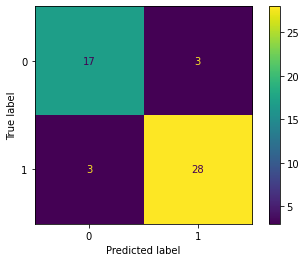

In [27]:
run_model(log_model, scaled_X_train, y_train, scaled_X_test, y_test)

##KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

accuracy_score: <function accuracy_score at 0x7ff35539e710>
0.8823529411764706
class_report:<function classification_report at 0x7ff3553a0050>
              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.86      0.97      0.91        31

    accuracy                           0.88        51
   macro avg       0.90      0.86      0.87        51
weighted avg       0.89      0.88      0.88        51

confusion_matrix: <function plot_confusion_matrix at 0x7ff3551c40e0>


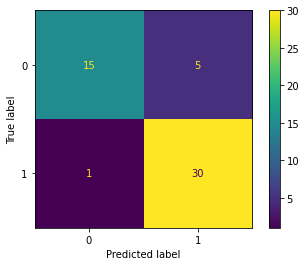

In [33]:
run_model(knn, scaled_X_train, y_train, scaled_X_test, y_test)

##Support Vector Classification

In [34]:
from sklearn.svm import SVC

In [35]:
svc = SVC()

In [36]:
scaler = StandardScaler()

In [37]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [38]:
svc.fit(scaled_X_train, y_train)

SVC()

accuracy_score: <function accuracy_score at 0x7ff35539e710>
0.6862745098039216
class_report:<function classification_report at 0x7ff3553a0050>
              precision    recall  f1-score   support

           0       0.57      0.85      0.68        20
           1       0.86      0.58      0.69        31

    accuracy                           0.69        51
   macro avg       0.71      0.72      0.69        51
weighted avg       0.74      0.69      0.69        51

confusion_matrix: <function plot_confusion_matrix at 0x7ff3551c40e0>


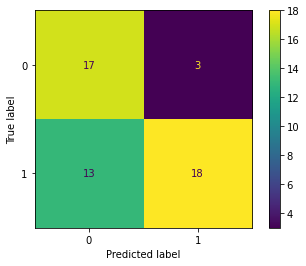

In [39]:
run_model(svc, scaled_X_train, y_train, scaled_X_test, y_test)

##Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
scaler = StandardScaler()

In [42]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [43]:
dtc = DecisionTreeClassifier()

accuracy_score: <function accuracy_score at 0x7ff35539e710>
0.8823529411764706
class_report:<function classification_report at 0x7ff3553a0050>
              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.86      0.97      0.91        31

    accuracy                           0.88        51
   macro avg       0.90      0.86      0.87        51
weighted avg       0.89      0.88      0.88        51

confusion_matrix: <function plot_confusion_matrix at 0x7ff3551c40e0>


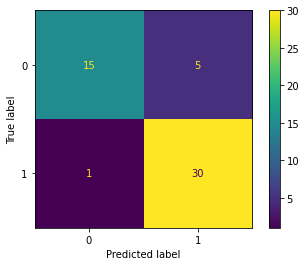

In [44]:
run_model(dtc, scaled_X_train, y_train, scaled_X_test, y_test)

In [45]:
#importing_features
dtc.feature_importances_

array([0.68682857, 0.15867696, 0.03726327, 0.        , 0.01798345,
       0.00773083, 0.008046  , 0.08347092])

In [46]:
imp_feat = pd.DataFrame(index=X.columns,data=dtc.feature_importances_,columns=['Feature_Importance'])

In [47]:
imp_feat.sort_values('Feature_Importance', ascending=False)

,Feature_Importance
Salary,0.686829
Degree Level_Diploma,0.158677
Nationality_Saudi,0.083471
Degree Level_Doctorate,0.037263
Degree Level_Master Degree,0.017983
Degree Level_Secondary,0.008046
Degree Level_Primary,0.007731
Degree Level_Intermediate,0.000000


##RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
scaler = StandardScaler()

In [50]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [51]:
rfc = RandomForestClassifier()

accuracy_score: <function accuracy_score at 0x7ff35539e710>
0.9019607843137255
class_report:<function classification_report at 0x7ff3553a0050>
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.86      1.00      0.93        31

    accuracy                           0.90        51
   macro avg       0.93      0.88      0.89        51
weighted avg       0.92      0.90      0.90        51

confusion_matrix: <function plot_confusion_matrix at 0x7ff3551c40e0>


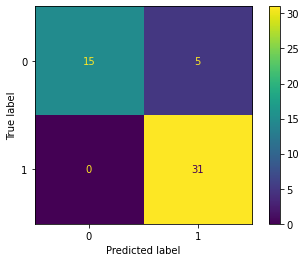

In [52]:
run_model(rfc, scaled_X_train, y_train, scaled_X_test, y_test)

In [53]:
rfc.feature_importances_

array([0.87085581, 0.01539143, 0.01638833, 0.0139073 , 0.01359797,
       0.01548842, 0.01411082, 0.04025991])

In [54]:
imp_feat_R = pd.DataFrame(index=X.columns,data=rfc.feature_importances_,columns=['Feature_Importance'])

In [55]:
imp_feat_R.sort_values('Feature_Importance', ascending=False)

,Feature_Importance
Salary,0.870856
Nationality_Saudi,0.040260
Degree Level_Doctorate,0.016388
Degree Level_Primary,0.015488
Degree Level_Diploma,0.015391
Degree Level_Secondary,0.014111
Degree Level_Intermediate,0.013907
Degree Level_Master Degree,0.013598


##AdaBoostClassifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
scaler = StandardScaler()

In [58]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [59]:
AdaB = AdaBoostClassifier()

accuracy_score: <function accuracy_score at 0x7ff35539e710>
0.8235294117647058
class_report:<function classification_report at 0x7ff3553a0050>
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.87      0.84      0.85        31

    accuracy                           0.82        51
   macro avg       0.81      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51

confusion_matrix: <function plot_confusion_matrix at 0x7ff3551c40e0>


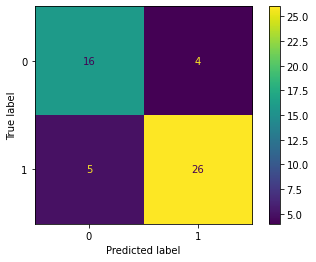

In [60]:
run_model(AdaB, scaled_X_train, y_train, scaled_X_test, y_test)

In [61]:
AdaB.feature_importances_

array([0.48, 0.04, 0.16, 0.06, 0.06, 0.06, 0.06, 0.08])

In [62]:
imp_feat_AdaB = pd.DataFrame(index=X.columns,data=AdaB.feature_importances_,columns=['Feature_Importance'])

In [63]:
imp_feat_AdaB.sort_values('Feature_Importance', ascending=False)

,Feature_Importance
Salary,0.48
Degree Level_Doctorate,0.16
Nationality_Saudi,0.08
Degree Level_Intermediate,0.06
Degree Level_Master Degree,0.06
Degree Level_Primary,0.06
Degree Level_Secondary,0.06
Degree Level_Diploma,0.04


##GradientBoostingClassifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
scaler = StandardScaler()

In [66]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [67]:
Gd = GradientBoostingClassifier()

accuracy_score: <function accuracy_score at 0x7ff35539e710>
0.8431372549019608
class_report:<function classification_report at 0x7ff3553a0050>
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.85      0.90      0.88        31

    accuracy                           0.84        51
   macro avg       0.84      0.83      0.83        51
weighted avg       0.84      0.84      0.84        51

confusion_matrix: <function plot_confusion_matrix at 0x7ff3551c40e0>


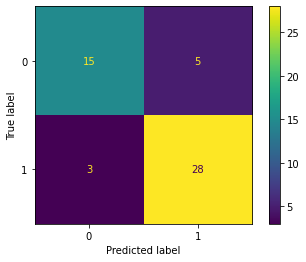

In [68]:
run_model(Gd, scaled_X_train, y_train, scaled_X_test, y_test)

In [69]:
Gd.feature_importances_

array([0.73645703, 0.09393396, 0.06001596, 0.0025143 , 0.032452  ,
       0.01289221, 0.03464179, 0.02709275])

In [70]:
imp_feat_Gd = pd.DataFrame(index=X.columns,data=Gd.feature_importances_,columns=['Feature_Importance'])

In [71]:
imp_feat_Gd.sort_values('Feature_Importance', ascending=False)

,Feature_Importance
Salary,0.736457
Degree Level_Diploma,0.093934
Degree Level_Doctorate,0.060016
Degree Level_Secondary,0.034642
Degree Level_Master Degree,0.032452
Nationality_Saudi,0.027093
Degree Level_Primary,0.012892
Degree Level_Intermediate,0.002514


In [73]:
# Based from Machine Learming Algorithms resuilts it looks  RandomForestClassifier perfome better 
# with 0.90 accuracy